# Plot the kinematics recovery using "triaxial ellipticity"

The calculation code in in './triaxial_ellipticity_kin_recovery.ipynb'

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd

from cycler import cycler
import matplotlib as mpl
clist = ['#04B2D9', '#F2B33D', '#F29966', '#F2441D', '#0486C5']
mpl.rcParams['axes.prop_cycle'] = cycler(color=clist)
import matplotlib.patches as patches

from deproject.Util.ellipticity import Axis_ratio2ellipticity
from scipy.stats import gaussian_kde

In [2]:
data_oblate_tri = np.load('./triaxial_ellipticity_oblate.npy')
data_prolate_tri = np.load('./triaxial_ellipticity_prolate.npy')

data_oblate_axi = np.load('./tng_kin_oblate.npy')
data_prolate_axi = np.load('./tng_kin_prolate.npy')

data_oblate_axi[1, :] = Axis_ratio2ellipticity(data_oblate_axi[1, :])
data_prolate_axi[1, :] = -1 * Axis_ratio2ellipticity(data_prolate_axi[1, :])

In [3]:
def percent_diff(a, b):
    return np.abs(a-b) / np.mean([a, b]) * 100

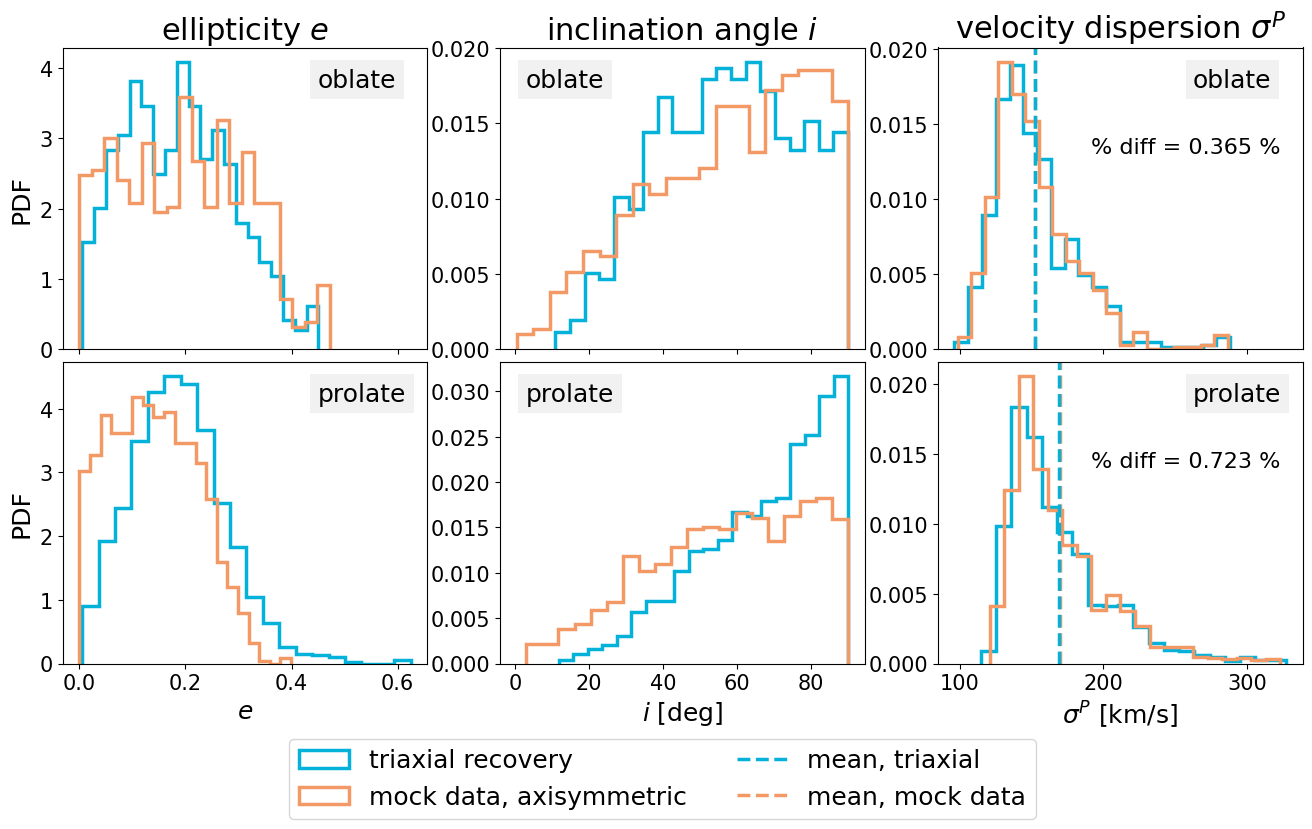

In [4]:
# Create a figure and a grid of subplots
fig = plt.figure(figsize = (16, 8))
gs = fig.add_gridspec(2, 3, hspace=0.04)
axs = gs.subplots(sharex='col')
axs = axs.flatten()

color_data = clist[2]
color_tri = clist[0]

lw_hist = 2.5

for ax in axs.flatten():
    ax.xaxis.label.set(fontsize=18)
    ax.yaxis.label.set(fontsize=18)
    ax.tick_params(axis='both', labelsize = 15)

data_axi = [data_oblate_axi, data_prolate_axi]

for j, data in enumerate([data_oblate_tri, data_prolate_tri]):

    # plot the triaxial data
    axs[3*j].hist(data[1, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_tri)
    axs[3*j+1].hist(np.degrees(data[0, :]), bins=20, density=True, histtype='step', lw=lw_hist, color=color_tri)
    axs[3*j+2].hist(data[2, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_tri)

    # plot the axisymmetric data
    axs[3*j].hist(data_axi[j][1, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_data)
    axs[3*j+1].hist(data_axi[j][3, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_data)
    axs[3*j+2].hist(data_axi[j][2, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_data)

    # plot the mean values
    mean_sigma_e_data = np.mean(data_axi[j][2, :])
    mean_vel_disp_tri_all = np.mean(data[2, :])
    axs[3*j+2].axvline(mean_sigma_e_data, marker = ' ', ls = '--', label = 'mean, mock data', color=color_data, lw=lw_hist)
    axs[3*j+2].axvline(mean_vel_disp_tri_all, marker = ' ', ls = '--', label = 'mean, recovered triaxial', color = color_tri, lw=lw_hist)
    axs[3*j+2].text(0.42, 0.65, s = '% diff = {:.3f} %' .format(percent_diff(mean_sigma_e_data, mean_vel_disp_tri_all)), fontsize=16, transform = axs[3*j+2].transAxes)


axs[0].set_title('ellipticity $e$', fontsize=22)
axs[1].set_title('inclination angle $i$', fontsize=22)
axs[2].set_title(r'velocity dispersion $\sigma^P$', fontsize=22)
axs[0].set_ylabel('PDF', fontsize=18)
axs[3].set_ylabel('PDF', fontsize=18)
# axs[3].sharey(axs[0])
# axs[4].sharey(axs[1])
# axs[5].sharey(axs[2])
axs[3].set_xlabel('$e$', fontsize=18)
axs[4].set_xlabel('$i$ [deg]', fontsize=18)
axs[5].set_xlabel(r'$\sigma^P$ [km/s]', fontsize=18)

# anootate for oblate and prolate
props = dict(boxstyle = 'square', facecolor = 'lightgray', alpha = 0.3, edgecolor = 'None')
for ax in [axs[0], axs[2]]:
    ax.text(0.7, 0.87, 'oblate', transform = ax.transAxes, fontsize = 18, bbox=props)
for ax in [axs[3], axs[5]]:
    ax.text(0.7, 0.87, 'prolate', transform = ax.transAxes, fontsize = 18, bbox=props)
axs[1].text(0.07, 0.87, 'oblate', transform = axs[1].transAxes, fontsize = 18, bbox=props)
axs[4].text(0.07, 0.87, 'prolate', transform = axs[4].transAxes, fontsize = 18, bbox=props)

# make some dummy plots for the legend 
handles = []
handles.append(patches.Patch(edgecolor=color_tri, facecolor='none', label='triaxial recovery', lw=lw_hist))
handles.append(patches.Patch(edgecolor=color_data, facecolor='none', label='mock data, axisymmetric', lw = lw_hist))
handles.append(plt.Line2D([0], [0], marker = ' ', ls = '--', label = 'mean, triaxial', color = color_tri, lw=lw_hist))
handles.append(plt.Line2D([0], [0], marker = ' ', ls = '--', label = 'mean, mock data', color = color_data, lw=lw_hist))
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=18)

# plt.savefig('./triaxial_ellipticity.pdf', bbox_inches='tight', dpi=300)

# Show plot
plt.show()

## Weight the relative difference in the recovered velocity dispersion using the distribution of the observed ellipticity of the TNG sample and the SLACS lenses

True
False
True


/tmp/ipykernel_1056534/2865127997.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_slacs = pd.read_csv('../tableA1.txt', delim_whitespace=True, comment='#', header=None, on_bad_lines='skip')


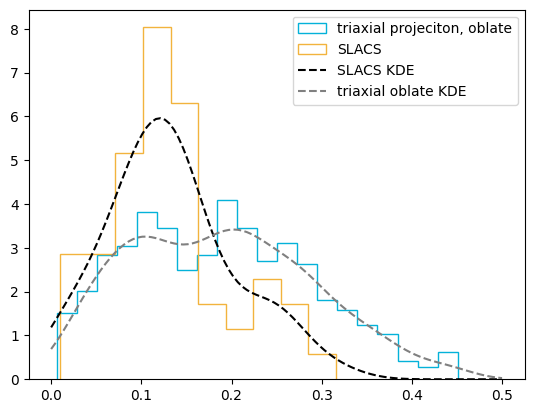

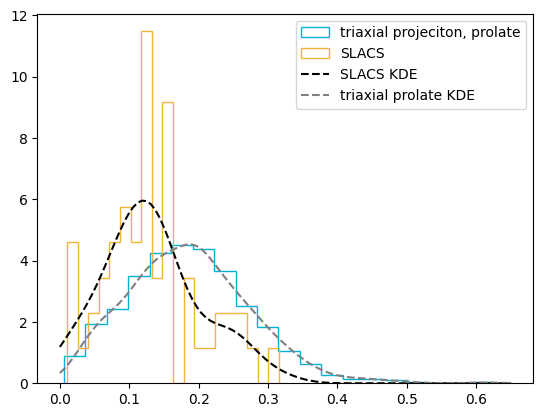

0.2521498293348302
0.09852252151133334


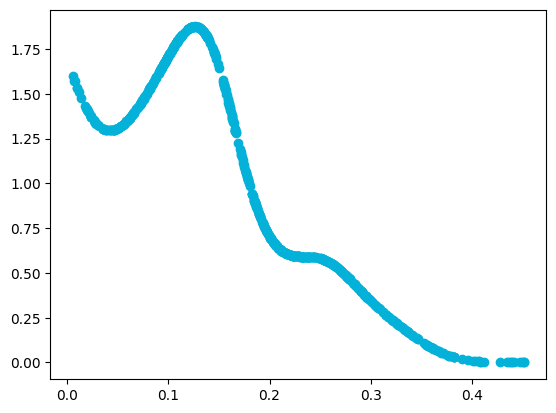

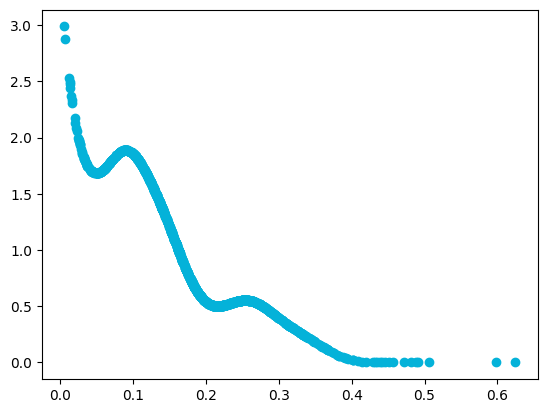

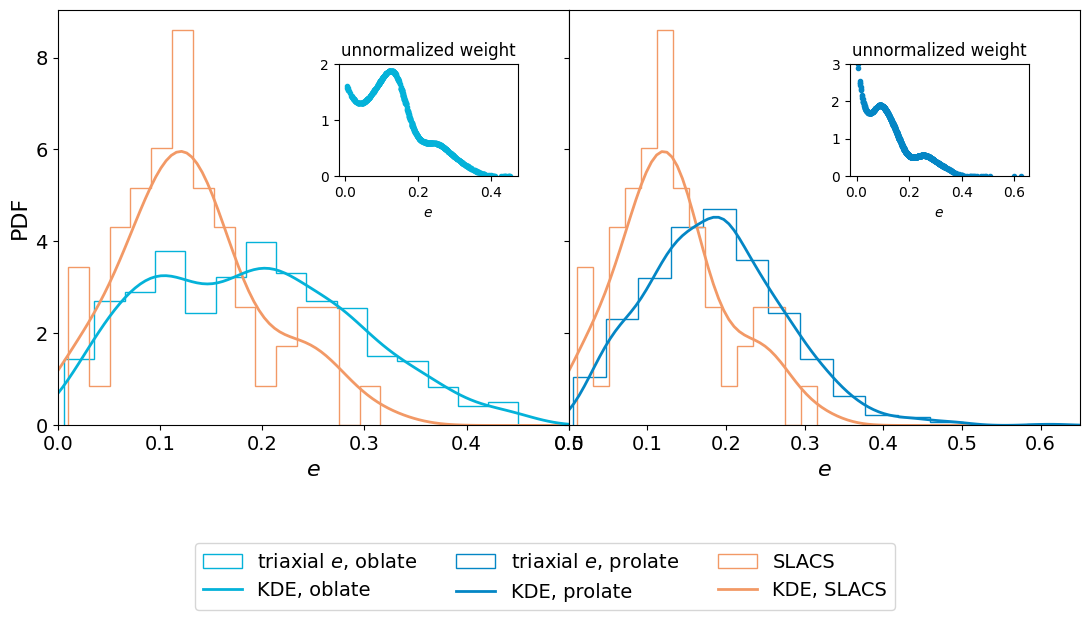

In [5]:
# access the SLACS lenses
data_slacs = pd.read_csv('../tableA1.txt', delim_whitespace=True, comment='#', header=None, on_bad_lines='skip')

# select only the lenses
flag_lens = (data_slacs[17].values.astype('str') == 'A') & (data_slacs[18].values.astype('int') == 0) & (data_slacs[15].values.astype('str') == 'E') # & (data_slacs[9].values.astype('float') >= 0.6) # only the early-type

data_slacs = data_slacs[flag_lens]

sigma_slacs = data_slacs[11].values.astype('float')
print(np.all(np.isfinite(sigma_slacs)) == True)
print(np.all(sigma_slacs > 0.))

sigma_mask = sigma_slacs > 0.
sigma_slacs = sigma_slacs[sigma_mask]
print(np.all(sigma_slacs > 0.))

qobs_slacs = data_slacs[9].values.astype('float')
eobs_slacs = (1-qobs_slacs) / (1+qobs_slacs)

# axis ratio of the TNG sample: 
eobs_oblate_tri = data_oblate_tri[1, :]
plt.figure()
plt.hist(eobs_oblate_tri, bins=20, density=True, histtype='step', label = 'triaxial projeciton, oblate')
plt.hist(eobs_slacs, bins=10, density=True, histtype='step', label = 'SLACS')
# kde of the slacs lenses
kde_slacs = gaussian_kde(eobs_slacs)
kde_oblate = gaussian_kde(eobs_oblate_tri)
x_oblate = np.linspace(0, 0.5, 100)
plt.plot(x_oblate, kde_slacs(x_oblate), ls = '--', color='k', label = 'SLACS KDE')
plt.plot(x_oblate, kde_oblate(x_oblate), ls = '--', color='gray', label = 'triaxial oblate KDE')
plt.legend()

eobs_prolate_tri = data_prolate_tri[1, :]
kde_prolate = gaussian_kde(eobs_prolate_tri)
x_prolate = np.linspace(0, 0.65, 100)
plt.figure()
plt.hist(eobs_prolate_tri, bins=20, density=True, histtype='step', label = 'triaxial projeciton, prolate')
plt.hist(eobs_slacs, bins=20, density=True, histtype='step', label = 'SLACS')
plt.plot(x_prolate, kde_slacs(x_prolate), ls = '--', color='k', label = 'SLACS KDE')
plt.plot(x_prolate, kde_prolate(x_prolate), ls = '--', color='gray', label = 'triaxial prolate KDE')
plt.legend()
plt.show()

# calculate the weight for the mean difference based on the ratio of the density of the observed ellipticity
weight_oblate  = kde_slacs(eobs_oblate_tri) / kde_oblate(eobs_oblate_tri)
weight_oblate_norm = weight_oblate / np.sum(weight_oblate)
plt.figure()
plt.plot(eobs_oblate_tri, weight_oblate, ls = ' ', marker = 'o')

# we now use the weight for the oblate to calculate the relative difference in the velocity dispersion
weighted_mean_sigma_e_oblate_tri = np.sum(weight_oblate_norm * data_oblate_tri[2, :])
weighted_mean_sigma_e_oblate_axi = np.sum(weight_oblate_norm * data_oblate_axi[2, :])
print(percent_diff(weighted_mean_sigma_e_oblate_tri, weighted_mean_sigma_e_oblate_axi))

# similarly we calculate the percentage difference in the velocity dispersion for the prolate
weight_prolate  = kde_slacs(eobs_prolate_tri) / kde_prolate(eobs_prolate_tri)
weight_prolate_norm = weight_prolate / np.sum(weight_prolate)
plt.figure()
plt.plot(eobs_prolate_tri, weight_prolate, ls = ' ', marker = 'o')
weighted_mean_sigma_e_prolate_tri = np.sum(weight_prolate_norm * data_prolate_tri[2, :])
weighted_mean_sigma_e_prolate_axi = np.sum(weight_prolate_norm * data_prolate_axi[2, :])
print(percent_diff(weighted_mean_sigma_e_prolate_tri, weighted_mean_sigma_e_prolate_axi))

# make a plot for the paper
fig = plt.figure(figsize=(11, 5))
gs = fig.add_gridspec(1, 2, wspace=0.)
axs = gs.subplots()
axs = axs.flatten()

color_slacs = clist[2]
color_oblate = clist[0]
color_prolate = clist[4]

# plot the histogram
axs[0].hist(eobs_oblate_tri, bins=15, density=True, histtype='step', color=color_oblate)
axs[0].hist(eobs_slacs, bins=15, density=True, histtype='step', color=color_slacs)
axs[0].plot(x_oblate, kde_slacs(x_oblate), ls = '-', color=color_slacs, label = 'SLACS KDE', lw=2)
axs[0].plot(x_oblate, kde_oblate(x_oblate), ls = '-', color=color_oblate, label = 'triaxial oblate KDE', lw=2)
axs[0].set_xlabel('$e$', fontsize=18)
axs[0].set_ylabel('PDF', fontsize=18)
axs[0].set_xlim([x_oblate.min(), x_oblate.max()])
# plot the weight
insert_x0, insert_y0, insert_width, insert_height = 0.55, 0.6, 0.35, 0.27
insert_ax = axs[0].inset_axes([insert_x0, insert_y0, insert_width, insert_height], transform=axs[0].transAxes)
insert_ax.plot(eobs_oblate_tri, weight_oblate, marker = '.', ls = ' ', color=color_oblate)
insert_ax.set_title('unnormalized weight')
insert_ax.set_xlabel('$e$')
insert_ax.set_yticks(np.arange(0, 3, 1))
insert_ax.set_ylim([0, 2])

axs[1].hist(eobs_prolate_tri, bins=15, density=True, histtype='step', color=color_prolate)
axs[1].hist(eobs_slacs, bins=15, density=True, histtype='step', color=color_slacs)
axs[1].plot(x_prolate, kde_slacs(x_prolate), ls = '-', color=color_slacs, label = 'SLACS KDE', lw=2)
axs[1].plot(x_prolate, kde_prolate(x_prolate), ls = '-', color=color_prolate, label = 'triaxial prolate KDE', lw=2)
axs[1].set_xlabel('$e$', fontsize=18)
axs[1].set_yticklabels([])
axs[1].set_xlim([x_prolate.min(), x_prolate.max()])
# plot the weight
insert_ax = axs[1].inset_axes([insert_x0, insert_y0, insert_width, insert_height], transform=axs[1].transAxes)
insert_ax.plot(eobs_prolate_tri, weight_prolate, marker = '.', ls = ' ', color=color_prolate)
insert_ax.set_title('unnormalized weight')
insert_ax.set_xlabel('$e$')
insert_ax.set_ylim([0, 3])
insert_ax.set_yticks(np.arange(0, 4, 1))


for ax in axs.flatten():
    ax.xaxis.label.set(fontsize=16)
    ax.yaxis.label.set(fontsize=16)
    ax.tick_params(axis='both', labelsize = 14)

# make figure legend
handles = []
handles.append(patches.Patch(edgecolor=color_oblate, facecolor='none', label='triaxial $e$, oblate'))
handles.append(plt.Line2D([0], [0], marker = ' ', ls = '-', label = 'KDE, oblate', color=color_oblate, lw=2))
handles.append(patches.Patch(edgecolor=color_prolate, facecolor='none', label='triaxial $e$, prolate'))
handles.append(plt.Line2D([0], [0], marker = ' ', ls = '-', label = 'KDE, prolate', color=color_prolate, lw=2))
handles.append(patches.Patch(edgecolor=color_slacs, facecolor='none', label='SLACS'))
handles.append(plt.Line2D([0], [0], marker = ' ', ls = '-', label = 'KDE, SLACS', color=color_slacs, lw=2))
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3, fontsize=14)

fig.tight_layout()